In [17]:

# fix the path to 
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import requests
import os
import csv
import time

_ALPHA_VANTAGE_API_KEY = '1B12WIHQVF242FLA'
_ALPHA_VANTAGE_API_URL = "https://www.alphavantage.co/query?"    
_ALPHA_VANTAGE_TIMESERIES = 'TIME_SERIES_DAILY_ADJUSTED'

if not os.path.exists("C:\\Dati\\projects\\medium\\data"):
    os.makedirs("C:\\Dati\\projects\\medium\\data")

# https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo        
def retrieve_data( symbol, output_format ='json',output_size='compact'):
        """
        up to 5 API requests per minute and 500 requests per day
        output_size: compact (last 100 bar), full( 20 years)
        """        
        response = requests.get("%sfunction=%s&symbol=%s&apikey=%s&datatype=%s&outputsize=%s" %(
            _ALPHA_VANTAGE_API_URL, _ALPHA_VANTAGE_TIMESERIES, symbol, _ALPHA_VANTAGE_API_KEY, output_format,output_size
            ) )
        if response.status_code != 200:
            print("Abort Status code: " + str(response.status_code))
            exit(1)
    
        if 'json' in output_format:
            json_response = response.json()
            if "Error Message" in json_response:
                raise ValueError(json_response["Error Message"])
            elif "Information" in json_response:
                raise ValueError(json_response["Information"])
            return json_response
        else:
            lines = response.text.splitlines()
            header = [h.strip() for h in lines[0].split(',')]  # read and trim header row
            csv_response = csv.DictReader(lines[1:], fieldnames=header)
            if not csv_response:
                raise ValueError(
                    'Error getting data from the api, no return was given.')
            return csv_response


# Read data from file 'ccc.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
stocklist_df = pd.read_csv("C:\\Dati\\projects\\medium\\ccc.csv", sep=";")

for index, row in stocklist_df.iterrows():
    
    ticker = row['ticker']
    print("%s - %s" % (index, ticker))
    
    if os.path.exists('C:\\Dati\\projects\\medium\\data\\%s.csv'%ticker):
        continue


    # Preview the first 5 lines of the loaded data 
    data = retrieve_data(ticker, output_format='csv', output_size='full')
      
    # save data for additional load without usa the api
    f = open('C:\\Dati\\projects\\medium\\data\\%s.csv'%ticker, 'w', newline='\n', encoding='utf-8')
    # http://zetcode.com/python/csv/
    with f:
        writer = csv.writer(f)
    
        header = False
        for row in data:
            if header==False:
                writer.writerow(row)
                header=True
            writer.writerow(row.values())
    time.sleep(15)  # avoid pace limitation 


0 - AAPL
1 - MO
2 - T
3 - BKH
4 - CVX
5 - KO
6 - CBU
7 - ED
8 - XOM
9 - FRT
10 - HP


11 - KMB


12 - LEG


13 - MCY


14 - MDP


15 - NNN


16 - NWN


17 - ORI


18 - PG


19 - O


20 - TGT


21 - UBSI


22 - UVV


23 - UHT


24 - SRCE


25 - MMM


26 - AOS


27 - ABM


28 - AFL


29 - APD


30 - AWR


31 - WTR


32 - ADM


33 - ATO


34 - ADP


35 - BMI


36 - BDX


37 - BMS


38 - BRC


39 - BF-B


40 - CWT


41 - TYCB


42 - CSL


43 - CPKF


44 - CINF


45 - CTAS


46 - CLX


47 - CL


48 - CBSH


49 - CTBI


50 - CSVI


51 - CTWS


52 - CFR


53 - DCI


54 - DOV


55 - EFSI


56 - EV


57 - ECL


58 - EMR


59 - ERIE


60 - THFF


61 - FELE


62 - BEN


63 - GD


64 - GPC


65 - GRC


66 - FUL


67 - HRL


68 - ITW


69 - JKHY


70 - JNJ


71 - LANC


72 - MKC


73 - MGRC


74 - MDU


75 - MDT


76 - MGEE


77 - MSEX


78 - MSA


79 - NC


80 - NFG


81 - NDSN


82 - NUE


83 - PH


84 - PNR


85 - PEP


86 - PPG


87 - PX


88 - RLI


89 - ROP


90 - RPM


91 - SPGI


92 - SEIC


93 - SHW


94 - SJW


95 - SON


96 - SWK


97 - SCL


98 - SYK


99 - SYY


100 - TROW


101 - SKT


102 - TDS


103 - TNC


104 - TMP


105 - TR


106 - UGI


107 - UMBF


108 - VVC


109 - VFC


110 - GWW


111 - WBA


112 - WMT


113 - WST


114 - WABC


115 - WEYS


116 - WGL


117 - AROW


118 - ARTNA


119 - ATR


120 - CAT


121 - CB


122 - JW-A


123 - PSBQ


124 - FMCB


125 - SPX


126 - VGR


127 - APU


128 - WES


129 - HEP


130 - SEP


131 - ET


132 - TLP


133 - WHG


134 - OHI


135 - EPD


136 - ENB


137 - MMP


138 - WPC


139 - OKE


140 - PPL


141 - PM


142 - UBA


143 - NHI


144 - SO


145 - IBM


146 - BIP


147 - GIS


148 - D


149 - PETS


150 - OXY


151 - LAZ


152 - PFG


153 - EIX


154 - QCOM


155 - ISBA


156 - DUK


157 - DGICB


158 - VZ


159 - CNP


160 - DGICA


161 - MYBF


162 - WRK


163 - PRU


164 - R


165 - SJI


166 - OGE


167 - FLO


168 - K


169 - SBSI


170 - DLR


171 - BG


172 - CAH


173 - NWE


174 - LARK


175 - MXIM


176 - BMRC


177 - ODC


178 - SJM


179 - EVRG


180 - TJX


181 - THVB


182 - DTE


183 - FLIC


184 - AMNF


185 - BHB


186 - SRE


187 - TXN


188 - HUBB


189 - WEC


190 - WSM


191 - CMI


192 - POR


193 - SR


194 - ACU


195 - EAT


196 - ES


197 - LNT


198 - OZK


199 - LMT


200 - CCFN


201 - NKSH


202 - XEL


203 - UNM


204 - CZFS


205 - BKUTK


206 - AVA


207 - MSM


208 - ESS


209 - AXS


210 - BBY


211 - AMP


212 - HAS


213 - CBRL


214 - CMS


215 - FAST


216 - LYBC


217 - SWX


218 - FFMR


219 - NIDB


220 - AUBN


221 - NWFL


222 - PII


223 - AIZ


224 - NEE


225 - EVR


226 - TIF


227 - NJR


228 - NHC


229 - BOKF


230 - PB


231 - TRV


232 - CATC


233 - RGCO


234 - SXT


235 - RBCAA


236 - NUS


237 - ELS


238 - LECO


239 - QNTO


240 - HWKN


241 - EBMT


242 - YORW


243 - ADI


244 - UNP


245 - RBA


246 - IFF


247 - ANDE


248 - CHRW


249 - WM


250 - RTN


251 - CMCSA


252 - MCHP


253 - RSG


254 - HRS


255 - AWK


256 - MATW


257 - KR


258 - THG


259 - HI


260 - NOC


261 - BR


262 - RHI


263 - ABC


264 - IPAR


265 - ACN


266 - LLL


267 - CPK


268 - EBTC


269 - HONT


270 - NEU


271 - MSFT


272 - HCSG


273 - CNI


274 - RGA


275 - CASS


276 - AFG


277 - XLNX


278 - SLGN


279 - DNB


280 - RGLD


281 - RBC


282 - FNV


283 - ALB


284 - WLK


285 - FMAO


286 - CHD


287 - MCK


288 - LNN


289 - PRGO


290 - CSX


291 - GGG


292 - EXPD


293 - NKE


294 - UTMD


295 - JJSF


296 - STE


297 - FDX


298 - ISCA


299 - VSEC


300 - FDS


301 - COLM


302 - LMNR


303 - ROST


304 - RNR


305 - COST


306 - MNRO


307 - JBHT


308 - ZTS


309 - WYND


310 - XYL


311 - ZION


312 - WOR


313 - WPP


314 - WSFS


315 - WSBC


316 - WTBA


317 - WGP


318 - WAB


319 - WLKP


320 - WY


321 - WHR


322 - WMPN


323 - WLTW


324 - WINA


325 - WTFC


326 - WDFN


327 - WEN


328 - WBS


329 - WRI


330 - WEBK


331 - WFC


332 - WDFC


333 - WSO


334 - WTS


335 - WASH


336 - WCN


337 - WTBFA


338 - DIS


339 - WAFD


340 - VLP


341 - VTR


342 - VMC


343 - USPH


344 - MTN


345 - VLO


346 - UCFC


347 - UFCS


348 - UPS


349 - UNH


350 - UNTY


351 - UFPI


352 - TYBT


353 - TRN


354 - TRUX


355 - TRCB


356 - TSN


357 - USB


358 - UDR


359 - UMPQ


360 - UBSH


361 - UNB


362 - UBCP


363 - UCBI


364 - OC


365 - ORM


366 - OXM


367 - GLT


368 - PCAR


369 - PKG


370 - PKBK


371 - PEGI


372 - PDCO


373 - PAYX


374 - PBFX


375 - PAG


376 - PEBK


377 - PPLL


378 - PFE


379 - PSX


380 - PSXP


381 - PPBN


382 - PNW


383 - PNBI


384 - PNC


385 - PNM


386 - POL


387 - POOL


388 - PTBS


389 - POWI


390 - APTS


391 - PFBC


392 - PRI


393 - PRIM


394 - PLD


395 - PROV


396 - PFS


397 - PSB


398 - PEG


399 - QNBC


400 - QTS


401 - DGX


402 - RJF


403 - RMAX


404 - REG


405 - RF


406 - RS


407 - RMD


408 - RECN


409 - ROIC


410 - REXR


411 - ROK


412 - RCL


413 - RUTH


414 - RHP


415 - STBA


416 - SBRA


417 - SAFM


418 - SASR


419 - BFS


420 - SBFG


421 - SWM


422 - SMG


423 - SIGI


424 - SCI


425 - SFBS


426 - SHEN


427 - SCVL


428 - BSRR


429 - SIG


430 - SFNC


431 - SPG


432 - SSD


433 - SBGI


434 - SIX


435 - SWKS


436 - SLG


437 - SNA


438 - SOHO


439 - SFBC


440 - SSB


441 - SOMC


442 - SMBC


443 - LUV


444 - SGB


445 - SPTN


446 - SRLP


447 - STAG


448 - SMP


449 - SXI


450 - SGU


451 - SBUX


452 - STT


453 - STLD


454 - SCS


455 - SYBT


456 - STRT


457 - STBI


458 - INN


459 - STI


460 - SGC


461 - SNX


462 - SNV


463 - TCO


464 - AMTD


465 - TEL


466 - TEX


467 - TRNO


468 - TBNK


469 - TTEK


470 - TXRH


471 - TFSL


472 - HCKT


473 - THO


474 - TSBK


475 - TKR


476 - TTC


477 - TOWN


478 - TSCO


479 - TCBK


480 - GLOP


481 - GATX


482 - GNTX


483 - GEO


484 - GABC


485 - GTY


486 - GIL


487 - GBCI


488 - GAIN


489 - GS


490 - GT


491 - GSBC


492 - GBX


493 - GFF


494 - GPI


495 - GBNK


496 - GFED


497 - HAFC


498 - HOG


499 - HIG


Ticker: BKH p-value: 0.9472744311567818, H: 0.49483934436432986 


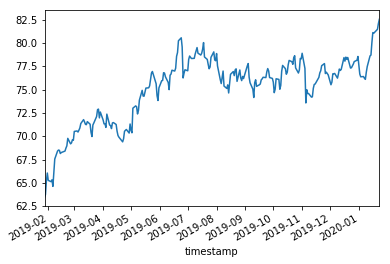

Ticker: XOM p-value: 0.35501023637766627, H: 0.4451162567678246 


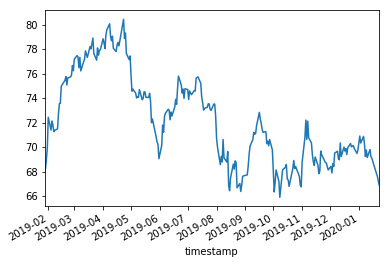

Ticker: NNN p-value: 0.21481796736704656, H: 0.4489578036062679 


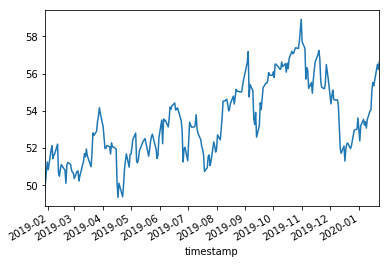

Ticker: UBSI p-value: 0.13416961927231635, H: 0.4211909478249555 


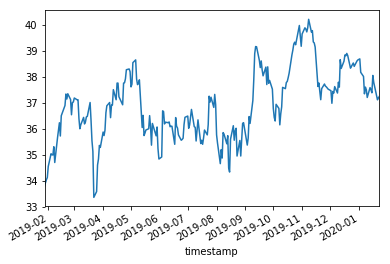

Ticker: AOS p-value: 0.3264424921886838, H: 0.49267871121197127 


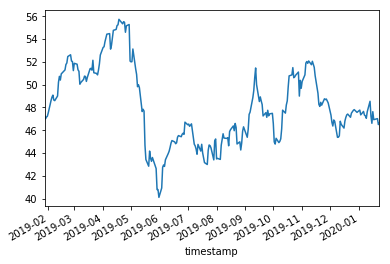

Ticker: CWT p-value: 0.47016166089873507, H: 0.48466004995224604 


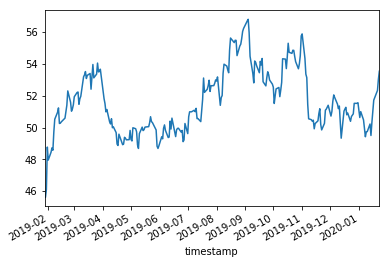

Ticker: CTWS p-value: 0.20817314387231534, H: 0.4621538973253554 


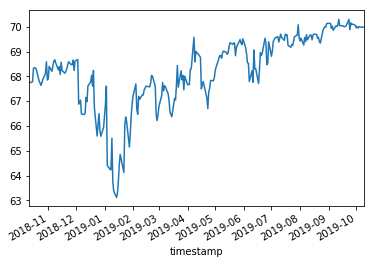

Ticker: DCI p-value: 0.4997303800490383, H: 0.49014386416524414 


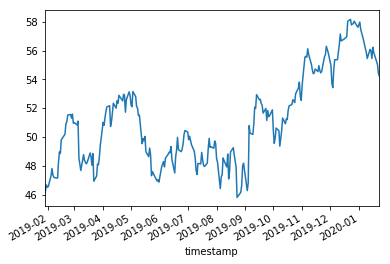

Ticker: GD p-value: 0.20890974758893704, H: 0.4992611025364185 


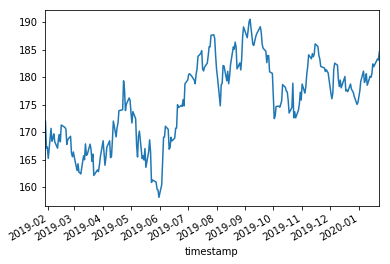

Ticker: FUL p-value: 0.2694355239489117, H: 0.4949939920649404 


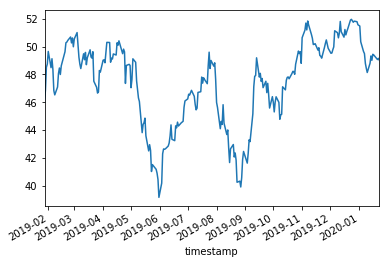

Ticker: JKHY p-value: 0.23678527060907617, H: 0.44057067186197174 


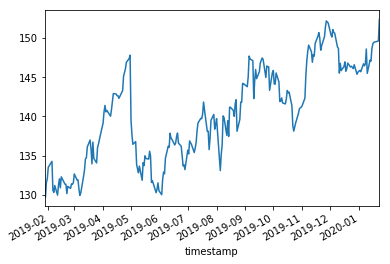

Ticker: JNJ p-value: 0.12436253369586497, H: 0.47999073274503806 


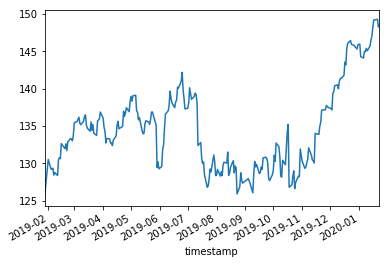

Ticker: MSEX p-value: 0.2137313252309601, H: 0.45327024014285483 


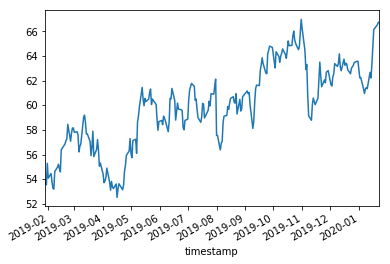

Ticker: NUE p-value: 0.33123415089380376, H: 0.48160690044642784 


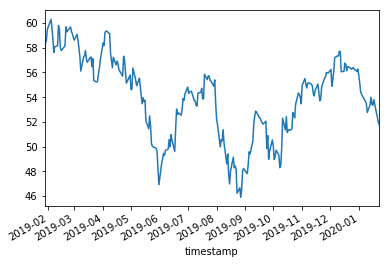

Ticker: TR p-value: 0.7116675411605262, H: 0.46372989084671834 


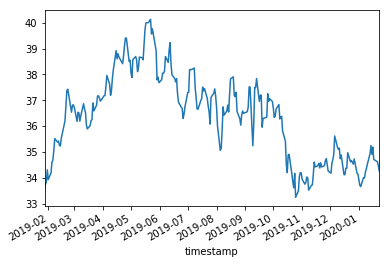

Some error found on this ticker: VVC
divide by zero encountered in true_divide


Ticker: VFC p-value: 0.2350734429050319, H: 0.4622718532487885 


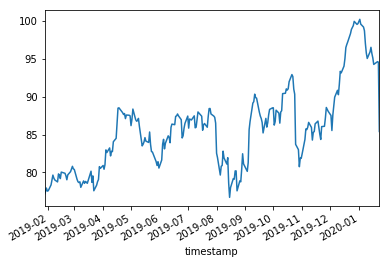

Ticker: WABC p-value: 0.19979090587373094, H: 0.4662308362969708 


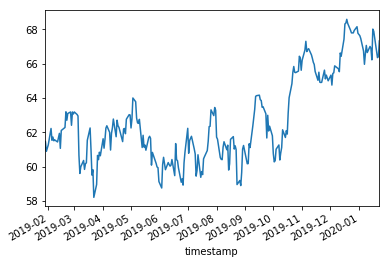

Ticker: WEYS p-value: 0.5327122459010101, H: 0.4952681921324732 


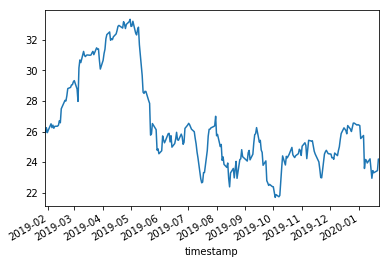

Ticker: JW-A p-value: 0.11492412625767978, H: 0.44471951652398617 


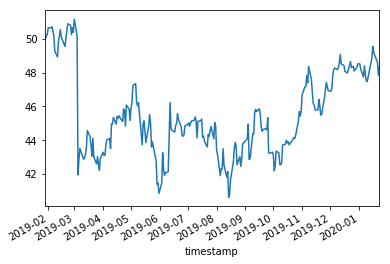

Ticker: WHG p-value: 0.6101137123150318, H: 0.4989521966866597 


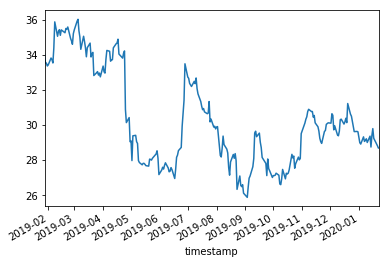

Ticker: PFG p-value: 0.36971356395758515, H: 0.43667519964498086 


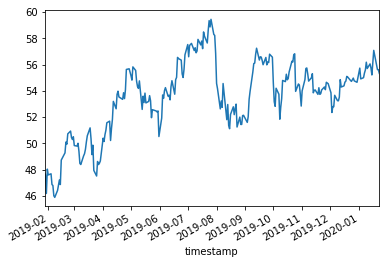

Ticker: DGICB p-value: 0.508224522335737, H: 0.32730409731036114 


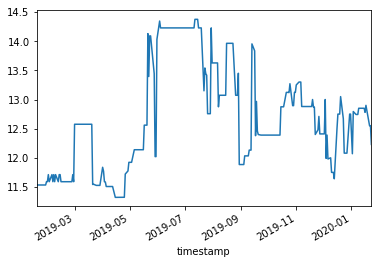

Ticker: DGICA p-value: 0.5582565963855949, H: 0.43269733595687354 


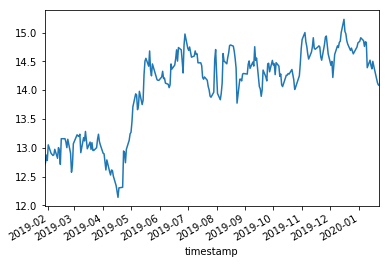

Ticker: R p-value: 0.2738342759685009, H: 0.4748761398608697 

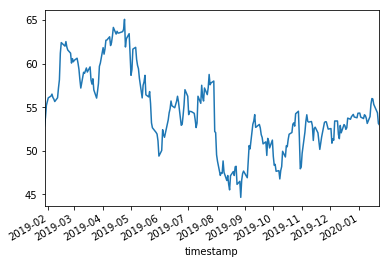

Ticker: SJI p-value: 0.26183894308056516, H: 0.4187680534058891 


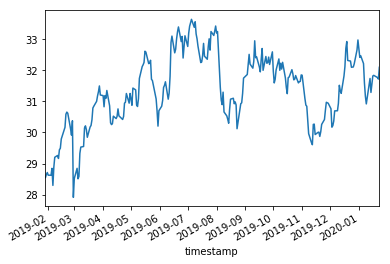

Ticker: BG p-value: 0.2871353264614787, H: 0.40108276695855444 


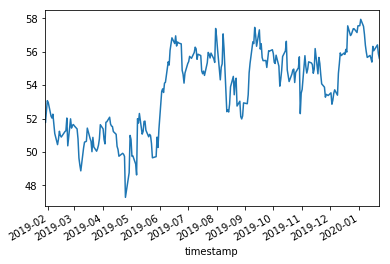

Ticker: NWE p-value: 0.9477838515775655, H: 0.4859702725156587 


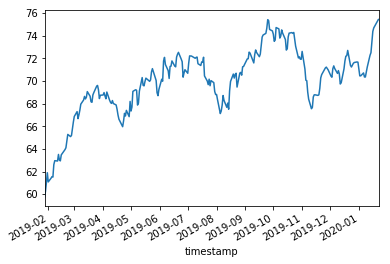

Ticker: BMRC p-value: 0.14227857188898524, H: 0.4838277774749329 


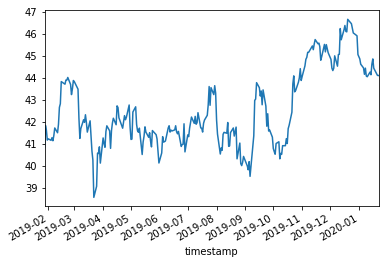

Ticker: ODC p-value: 0.43035937892531556, H: 0.48543221641766804 


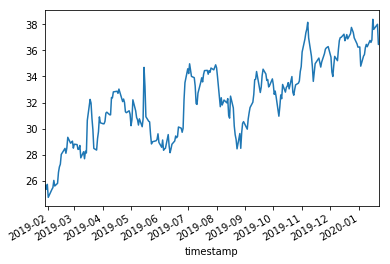

Ticker: THVB p-value: 0.5028645951217586, H: 0.49449448753523173 


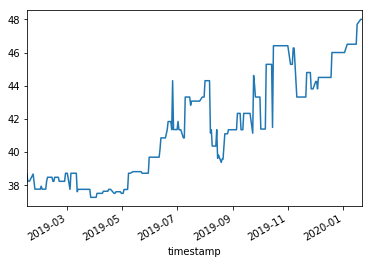

Ticker: BHB p-value: 0.16028064735188163, H: 0.40614344632500304 

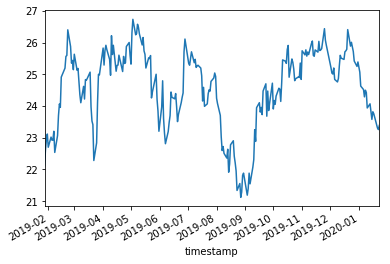

Ticker: SR p-value: 0.5059459437615814, H: 0.49131359791317425 


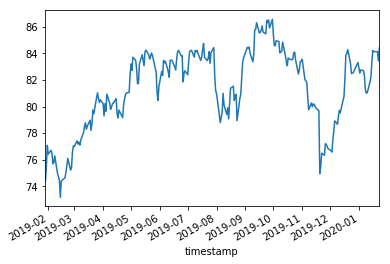

Ticker: CZFS p-value: 0.5230328724143279, H: 0.4350945944718754 


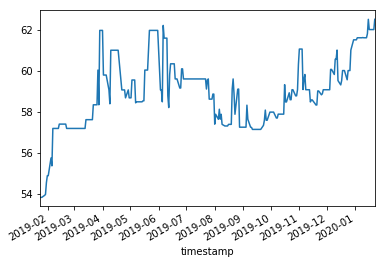

Ticker: BKUTK p-value: 0.14395716550108628, H: 0.42885865773824133 


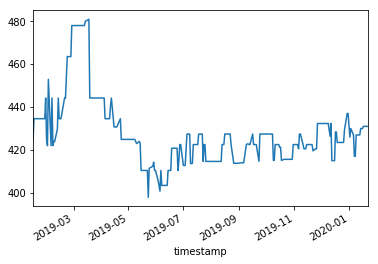

Ticker: MSM p-value: 0.49991209406895454, H: 0.4936210275434588 


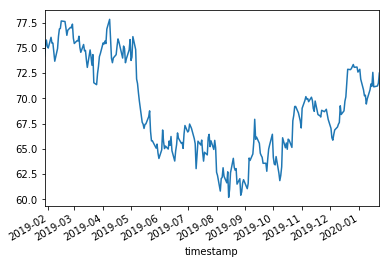

Ticker: FFMR p-value: 0.3379174494443328, H: 0.42735170036509795 


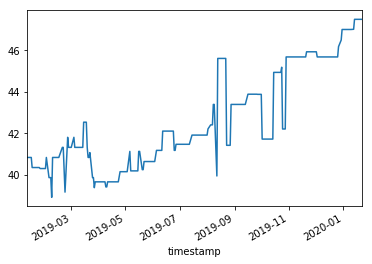

Ticker: PII p-value: 0.18477361382631874, H: 0.41392536126626944 


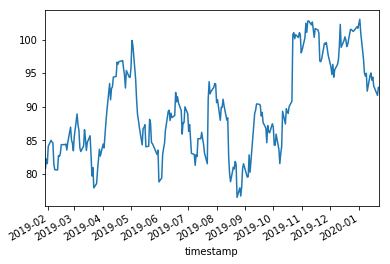

Ticker: EVR p-value: 0.28021268782226083, H: 0.46536835773009827 


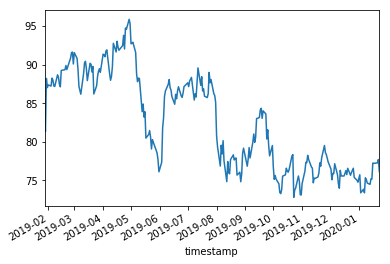

Ticker: NHC p-value: 0.27417823762236215, H: 0.49499235586039986 


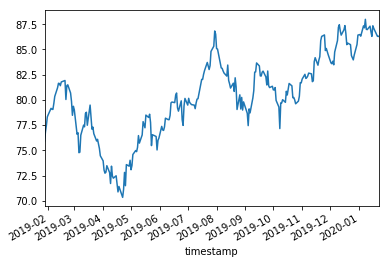

Ticker: BOKF p-value: 0.23901956589451928, H: 0.4352971478105777 


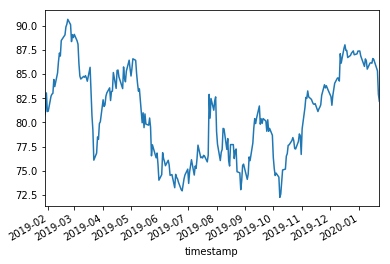

Ticker: CATC p-value: 0.13332796517075846, H: 0.34063609229742575 


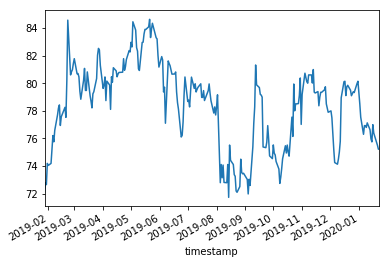

Ticker: SXT p-value: 0.36112807171241734, H: 0.4613021847762323 


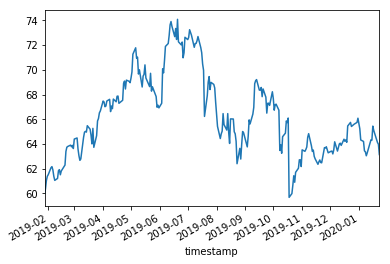

Ticker: RBCAA p-value: 0.5010188594313827, H: 0.4860279009184555 


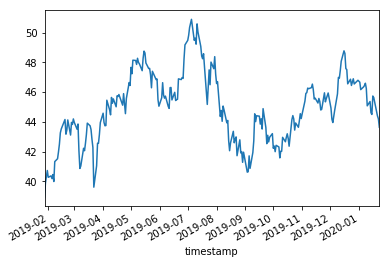

Ticker: HWKN p-value: 0.2603192208919888, H: 0.4895770367198201 


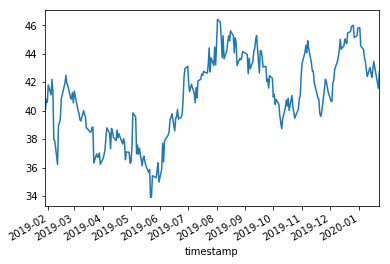

Ticker: ADI p-value: 0.23385690270678267, H: 0.4995392846234443 


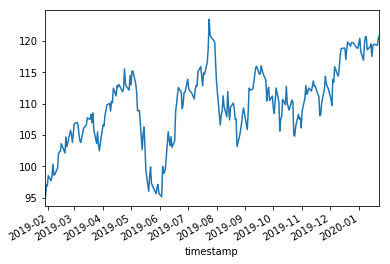

Ticker: IFF p-value: 0.26703680305121513, H: 0.4682046412522813 


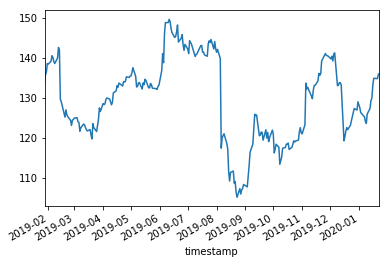

Ticker: IPAR p-value: 0.5856521437551987, H: 0.44193076109556606 


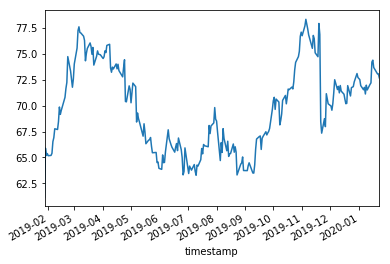

Ticker: HONT p-value: 0.3828334195717751, H: 0.42603132581693565 


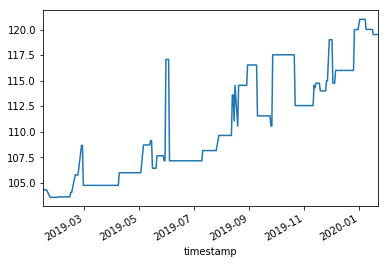

Ticker: CNI p-value: 0.36548390597230884, H: 0.44588364450010853 


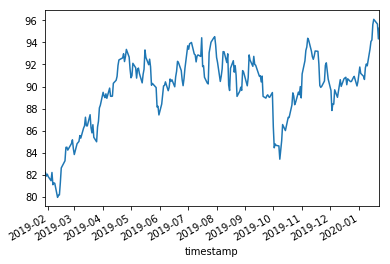

Ticker: SLGN p-value: 0.7210333829522146, H: 0.4692013841965987 


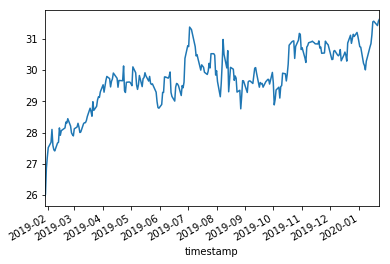

Ticker: WLK p-value: 0.1900240646788124, H: 0.4676160214887523 


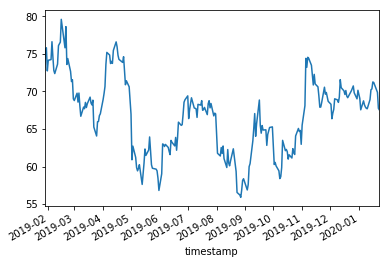

Ticker: MCK p-value: 0.20725783930390662, H: 0.4780465617590856 


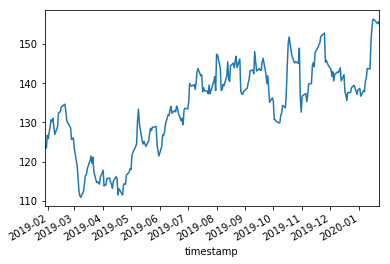

Ticker: CSX p-value: 0.40492107550587986, H: 0.48887726580340995 


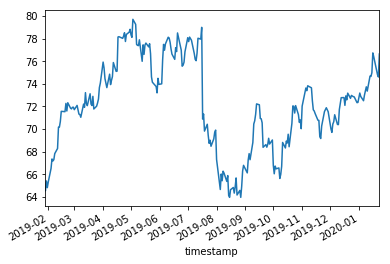

Ticker: EXPD p-value: 0.12202486728844075, H: 0.40568699045239914 


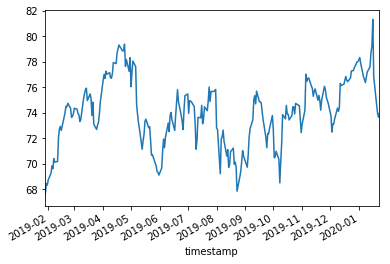

Ticker: FDX p-value: 0.2636303534789122, H: 0.4596837227133006 


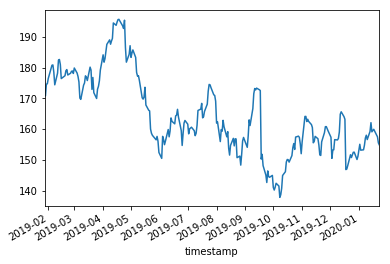

Ticker: COLM p-value: 0.1134370409046343, H: 0.4360362750758552 


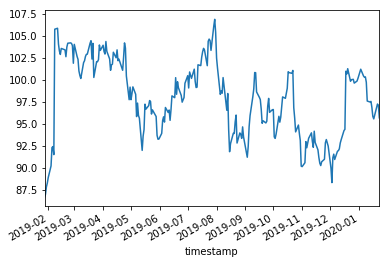

Ticker: LMNR p-value: 0.44965345451719985, H: 0.38631087552178317 


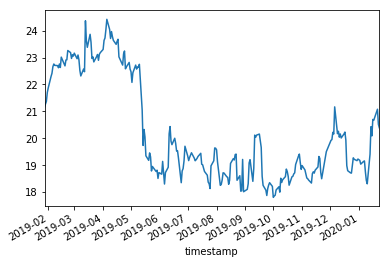

Ticker: XYL p-value: 0.261507302817516, H: 0.35965571959189213 


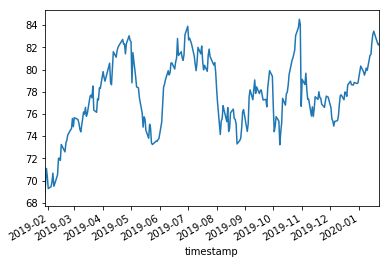

Ticker: WSBC p-value: 0.22211302403702476, H: 0.45507580365078476 


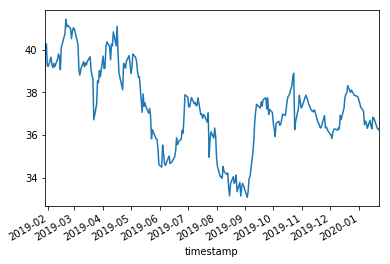

Ticker: WTFC p-value: 0.18178825844745, H: 0.4409484661503868 


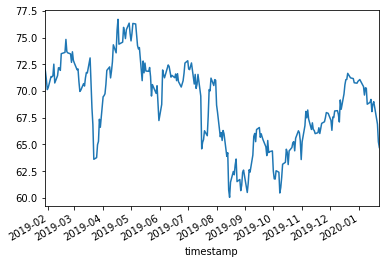

Ticker: WBS p-value: 0.47011597346728723, H: 0.47763084590416266 


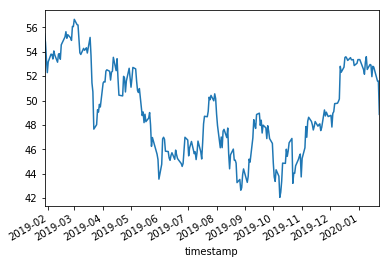

Ticker: WASH p-value: 0.17220044500387743, H: 0.4854323118102891 


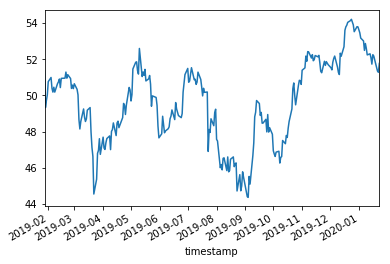

Ticker: WCN p-value: 0.7707221619378943, H: 0.47586075718347765 


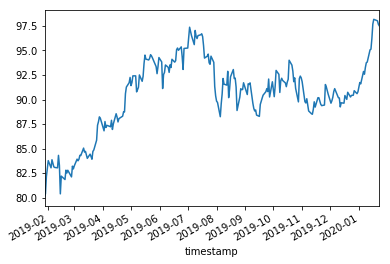

Ticker: WTBFA p-value: 0.11358152075174788, H: 0.42605045717836504 


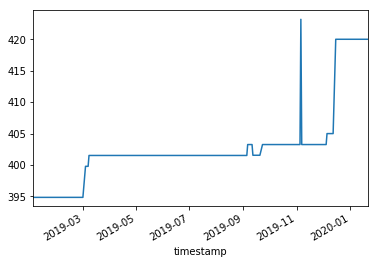

Ticker: UFCS p-value: 0.3128224978808385, H: 0.44794295680369 


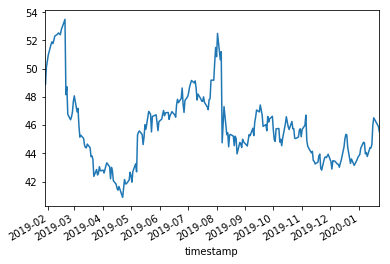

Ticker: UNTY p-value: 0.11690898375168957, H: 0.4936509436785628 


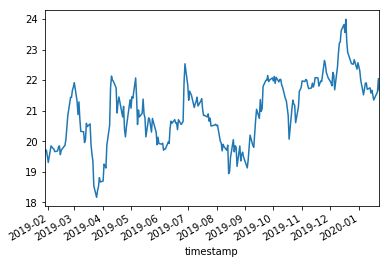

Ticker: PKBK p-value: 0.5431484085696644, H: 0.4651315316822498 


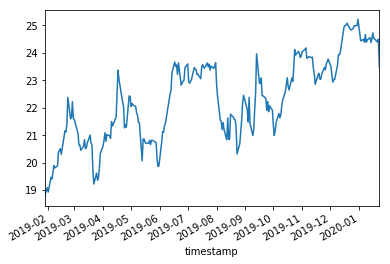

Ticker: PNW p-value: 0.4756167317757218, H: 0.40352224412479937 


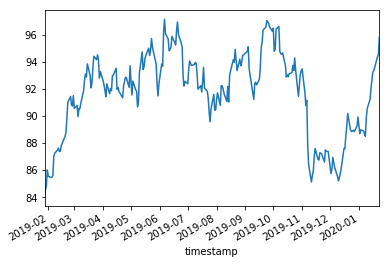

Ticker: PNBI p-value: 0.4343268341090822, H: 0.49639265874931265 


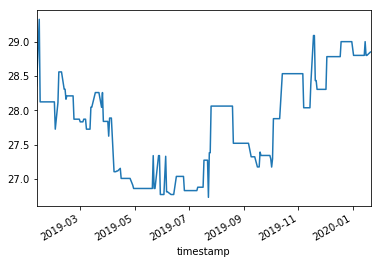

Ticker: PFS p-value: 0.26787744929027035, H: 0.4164836766771463 


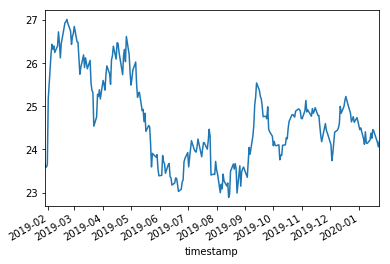

Ticker: QNBC p-value: 0.33171999967832655, H: 0.4310305032031447 


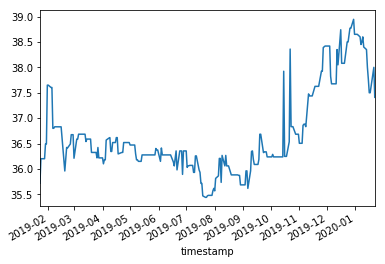

Ticker: REG p-value: 0.17337854692202392, H: 0.40048511843327356 


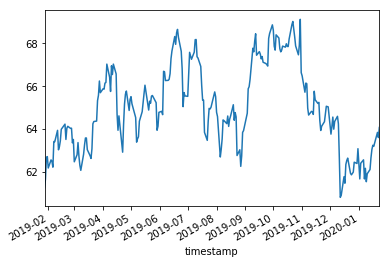

Ticker: ROIC p-value: 0.27173514896991413, H: 0.47753015712091446 


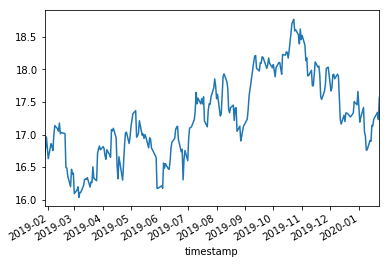

Ticker: SASR p-value: 0.2827196717222672, H: 0.4941277096138532 


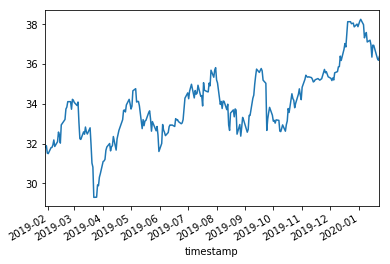

Ticker: LUV p-value: 0.1761083581297876, H: 0.4869048496191945 


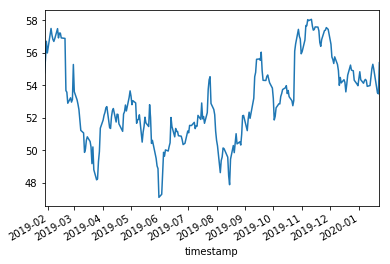

Ticker: SXI p-value: 0.24279879442748403, H: 0.4258527668788962 


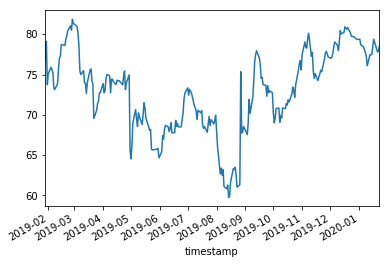

Ticker: SGU p-value: 0.2586315946439145, H: 0.42511674212678857 


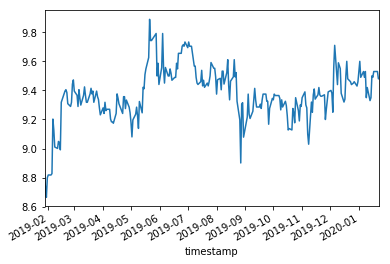

Ticker: INN p-value: 0.3064276161157319, H: 0.47390795790567286 


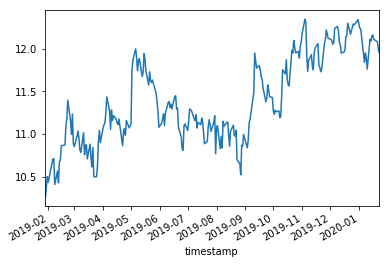

Ticker: SGC p-value: 0.289856919945648, H: 0.46491693517110644 


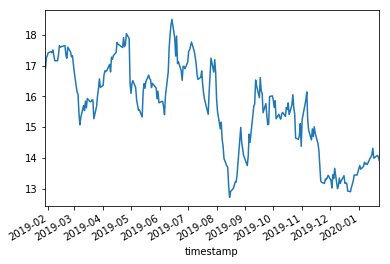

Ticker: SNV p-value: 0.11681596728139859, H: 0.4840047190763737 


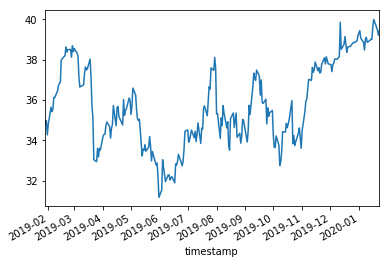

Ticker: TEL p-value: 0.506096128315129, H: 0.48667068453038925 


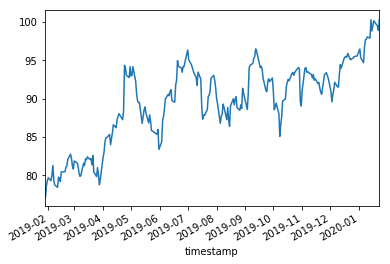

Ticker: TEX p-value: 0.1630614858990062, H: 0.4844311700183104 


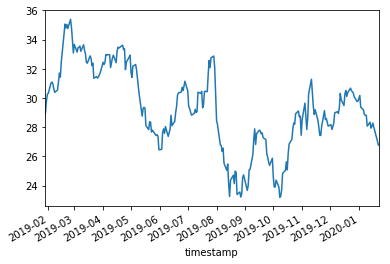

Ticker: TXRH p-value: 0.182021613485229, H: 0.4348145934266789 


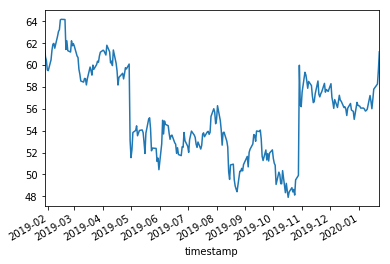

Ticker: TOWN p-value: 0.19620026602462276, H: 0.4905465897156441 


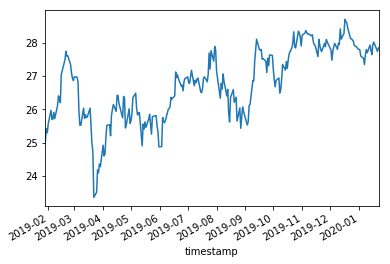

Ticker: TSCO p-value: 0.5398705359155616, H: 0.49956441615290686 


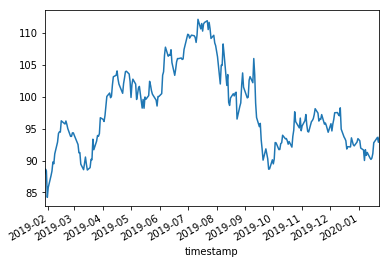

Ticker: TCBK p-value: 0.3982827785985509, H: 0.4968912274779859 


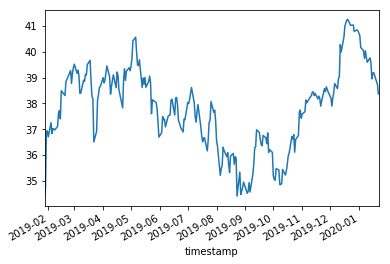

Results saved!


In [17]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# Augmented dicker-fuller test
from statsmodels.tsa.stattools import adfuller
# Hurst Exponent
from hurst import compute_Hc

def adf_test(timeseries):
    adft = adfuller(timeseries, autolag='AIC')
    return adft[1]

def hurst_test(timeseries):
    H, c, data = compute_Hc(timeseries, kind='price', simplified=True)
    return H

#####################################################################################
# windows of trading days
periods = [ 125, 250, 750, 1250]    # 6 months, 1 year, 3 years, 5 years

period = periods[1]

results = []
stocklist_df = pd.read_csv("C:\\Dati\\projects\\medium\\ccc.csv", sep=";")
for index, row in stocklist_df.iterrows():
    ticker = row['ticker']

    df = pd.read_csv("C:\\Dati\\projects\\medium\\data\\%s.csv" % ticker)   # load 20 years historical data
    try:
        df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')    
        df.set_index('timestamp', inplace=True)
    except:
        continue
        
    df = df[0:period]   # take last "period" samples
    #print(df.adjusted_close.head())
    #print(df.adjusted_close.tail())
    #break
    
    try:
        # augmented dicker fuller test
        adf = adf_test(df.adjusted_close)
        # Hurst exponent
        H, c, data = compute_Hc(df.adjusted_close, kind='price', simplified=True)
        
        
        # check price data on a chart
        if H < 0.5 and adf > 0.1:
            print( "Ticker: %s p-value: %s, H: %s " %(ticker, (adf), H) )
            df.adjusted_close.plot()
            plt.show()
                    

        results.append({'ticker': ticker, 'adf': adf, 'H': H})
        
    except Exception as e:
        print("Some error found on this ticker: %s" % ticker)
        print(str(e))
        #break
    
    
# save results
f = open('C:\\Dati\\projects\\medium\\results_%s.csv' % period, 'w', newline='\n', encoding='utf-8')
# http://zetcode.com/python/csv/
with f:
    writer = csv.writer(f)
    
    writer.writerow(['ticker', 'p-value', 'h'])
    for result in results:
        try:
            adt = [result['ticker'], result['adf'], result['H'] ] 
            writer.writerow(adt)
        except:
            pass

print("Results saved!")
